# Notebooks in ArcGIS Pro

This Notebook has been adapted from a training authored by Esri Canada, found [here](https://github.com/highered-esricanada/arcgis-notebooks-tutorial) and offered under a Creative Commons license ([CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/)).

In this lesson, you will be introduced to the ArcGIS API for Python and ArcPy libraries.

The integration of ArcGIS Notebooks directly within the ArcGIS Pro user interface was added as a new feature in ArcGIS Pro 2.5, released in February, 2020.  It provides all of the same core functionality as a standard Jupyter Notebook server, with some additional capabilities that come from running within the same Python environment that underlies the ArcGIS Pro's geoprocessing framework:

* Geometry data objects can be visualized directly in a code cell's output when a notebook is running within ArcGIS Pro.
* Layers in an active map or scene view in the current ArcGIS Pro project can be accessed by name, instead referencing a path to a dataset.
* New layers created as output from executing geoprocessing tools in a notebook can be automatically added to an active map or scene view in the current ArcGIS Pro project.

## Working with ArcGIS in Python

There are two libraries available for working with ArcGIS in Python: **ArcPy** and the **ArcGIS API for Python**.

Most users of ArcGIS on the desktop will be familar with **ArcPy** (`arcpy` in Python code).  The ArcPy library provides access to the complete desktop geoprocessing framework that ArcGIS users have been working with for many years.

The [**ArcGIS API for Python**](developers.arcgis.com/python/) (`arcgis` in Python code) is a relatively new library released by Esri.  It enables powerful spatial analysis, mapping, and GIS data processing, fully integrated with ArcGIS Online and ArcGIS Enterprise.  This library comes pre-installed with the Python environment in ArcGIS Pro, but may installed separately on *any* system with a Python 3 environment.  Although the `arcgis` library can be installed and used on its own, when it is loaded in a Python environment that includes the `arcpy`, it will integrate with desktop geoprocessing capaiblities to provide enhanced functionality. 

### Explore ArcPy

Getting started with ArcPy is as simple as executing `import arcpy` in a python code cell.  Samples later in this workshop will make use of the ArcPy geoprocessing framework.  For now, you will learn how to explore what `arcpy` has to offer within the Python notebook environment.

Following best practices in Python, you will begin this notebook by importing the modules that you will be using.  The `arcpy` does not need to be imported when a notebook is running inside of ArcGIS Pro, though it doesn't hurt to included anyway:

Start by executing the following cell to load the `arcpy` module:

In [131]:
import arcpy

Wait until the cell finishes executing (you will see the `*` character change to a number).

Next, place your cursor at the end of the code in the following cell, and press the `Tab` key to see a list of available functions in the `arcpy.managment` module.  Depending on the module (e.g., how many functions it provides), it may take a moment for a list to appear:

In [ ]:
arcpy.management.

In this example, you will be presented with a list of functions you use from the `arcpy.management` module.  If you have already spent some time working with ArcGIS desktop software, even if you haven't been writing any Python code before now, you likely will recognize many of these functions, as they correspond with the tools available in the ArcGIS geoprocessing toolbox.

If you need to know more about a specific function, select it from the dropdown list or type it into the code cell.  With your cursor placed immediately after the function name and before the parentheses `()`, press `SHIFT+Tab` to display a popup with documentation for the corresponding function.

Try this with the ReconstructTracks function that corresponds to the same tool in the GeoAnalytics toolbox available in ArcGIS Pro: 

In [ ]:
arcpy.gapro.ReconstructTracks()

Press `SHIFT+Tab` a second time, and the popup will expand to show a bit more.  A third time, and the box will linger on the screen for 10 seconds while you continue typing.  After a fourth time, a full documentation panel will be opened and will stay visible on screen (until the close button is clicked) with the function documentation displayed in it.

An alternative shortcut to display the full documentation in a persistent window is to execute the function name as a line of code with a `?` character on the end of it:

In [ ]:
arcpy.gapro.ReconstructTracks?

#### Layers automatically added to Map View

As noted, layers that are output from executing `arcpy` geoprocessing functions are automatically added to the map. We can set or eliminate this behavior using arcpy environment (`arcpy.env`) settings

To ensure the default behaviour in ArcGIS Pro to automatically add geoprocessing outputs to an active map or scene is enabled, and to ensure you are allowed to overwrite existing outputs, the following properties of the `arcpy.env` module may be set to `True`:

In [77]:
arcpy.env.addOutputsToMap = True
arcpy.env.overwriteOutput = True

### Explore the ArcGIS API for Python

With the `arcgis` library being designed for seamless integration with ArcGIS Online and ArcGIS Enterpise, a typical Python script using this library will begin by importing the GIS module and establing a connection to an ArcGIS Online or Enterprise portal.

In [37]:
from arcgis.gis import GIS
gis = GIS()

#### Connecting to your GIS

Without any arguments, the result of the `GIS()` function will be an anonymous connection to ArcGIS Online.  To connect to a specific portal, and to authenticate with your own user account, you must provide a URL, username, and password as arguments to the `GIS()` function.

However, because we are running this notebook within ArcGIS Pro, we can use the keyword `"pro"` to use the account [currently ascociated with ArcGIS Pro](https://developers.arcgis.com/python/guide/working-with-different-authentication-schemes/#connecting-through-arcgis-pro), without requiring the user to pass in credentials. See the [documentation for authentication schemes in the API](https://developers.arcgis.com/python/guide/working-with-different-authentication-schemes/) function for more information.

In [38]:
gis = GIS("pro")

#### Access and view data in ArcGIS Online or ArcGIS Enterprise

With a connection to your portal or ArcGIS Online, you can search for content, such as a Web Map:

In [76]:
search_result = gis.content.search(query="title: Current Weather and Wind Station Data AND owner:esri_IN_content", item_type="Web Map", outside_org=True)
search_result

[<Item title:"India: Current Weather and Wind Station Data" type:Web Map owner:esri_IN_content>]

<Item title:"India: Current Weather and Wind Station Data" type:Web Map owner:esri_IN_content>
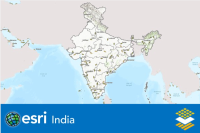

In [77]:
webmap_item = search_result[0]
webmap_item

Because this is already a web map in ArcGIS Online, we can display the web map by calling the `arcgis.mapping.WebMap` class and referencing the layer from ArcGIS Online.

In [75]:
from arcgis.mapping import WebMap
India_weather = WebMap(webmap_item)
India_weather

MapView(hide_mode_switch=True, layout=Layout(height='400px', width='100%'))

Now search for elevation data to display on a map

In [67]:
search_result = gis.content.search(query="India DEM AND owner:esri_IN_content", item_type="Image Service", outside_org=True)
search_result

[<Item title:"India DEM" type:Imagery Layer owner:esri_IN_content>]

<Item title:"India DEM" type:Imagery Layer owner:esri_IN_content>
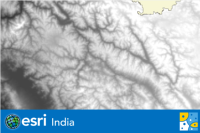

In [68]:
topography = search_result[0]
topography

Display the layer in a live map widget:

In [69]:
map1 = gis.map("India")
map1

MapView(layout=Layout(height='400px', width='100%'))

In [70]:
map1.add_layer(topography)

### Previewing geometries in the notebook environment

When working with data in ArcPy, you may often find yourself operating with [Geometry](https://pro.arcgis.com/en/pro-app/arcpy/classes/geometry.htm) objects for individual features.  Until now, you would need to visualize geometries by selecting them in an existing layer, or writing them to a new feature layer and viewing them in a map view.  However, within a Python notebook in ArcGIS, you can return the geometry on the last line of a code cell, and see a preview of the geometry as an embedded graphic.

As an example, you can use the `arcpy.da` data access module to inspect individual geometries of any layer (e.g., the [World Countries (Generalized)](https://edu.maps.arcgis.com/home/item.html?id=2b93b06dc0dc4e809d3c8db5cb96ba69) from the [ArcGIS Living Atlas of the World](https://livingatlas.arcgis.com/en/)). For feature layers in ArcGIS Online or ArcGIS Enterprise, you can use the URL to an individual layer the same as the file path to a local feature class.  Ensure that `'shape@'` is included in your list of selected field names.

When you have obtained a `Geometry` object, return it on the last line of the cell to see it visualize graphically in the cell's output.

Execute the cell below to see the generalized boundary for India, and/or try changing the name of the country in the SearchCursor's where_clause:

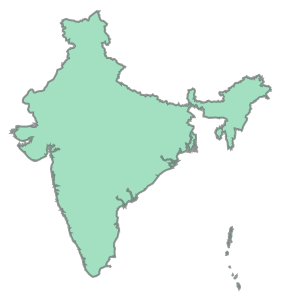

In [79]:
countries = gis.content.get('dbddb5f62a1647f791a1c5d422578782')

# Use SQL (where_clause) to identify a country of interest
for row in arcpy.da.SearchCursor(in_table=countries.layers[0].url, 
                                 field_names=["shape@"], 
                                 where_clause="COUNTRY = 'India'"):
    geom = row[0]
geom

Other objects often have similar rich notebook representations, such as Spatial Reference objects associated with geometries, feature classes, and layers (example below).  With each update to ArcPy and the ArcGIS API for Python, these types of representations are being introduced to improve the overall experience with ArcGIS Notebooks.

In [80]:
geom.spatialReference

name (Projected Coordinate System),WGS_1984_Web_Mercator_Auxiliary_Sphere
factoryCode (WKID),3857
linearUnitName (Linear Unit),Meter
name (Geographic Coordinate System),GCS_WGS_1984
factoryCode (WKID),4326
angularUnitName (Angular Unit),Degree
datumName (Datum),D_WGS_1984


### Accessing layers in an active Map

If you have a Map in ArcGIS Pro, then there will always be an active map. The `Contents` pane on the left will display the layers in the active map. We can connect to the active map using the `ArcGISProject` class in the `arcpy.mp` library. From there, you can access any of the map layers. 

Here we will print the names of each layer in the active map view.

In [95]:
# Get available information from the current map document
aprx = arcpy.mp.ArcGISProject("current")
m = aprx.activeMap
print('Active Map Name: {0}'.format(m.name))

# Get a list of map layers for the active map
map_layer_names = [layer.name for layer in m.listLayers()]
print('Active Map Layers: {0}'.format(map_layer_names))

Active Map Name: Map
Active Map Layers: ['India DEM', 'World Topographic Map', 'World Hillshade']


## Conclusion

In this notebook, the `arcgis` and `arcpy` libraries were introduced, showing how you can bring GIS data and functionality into your Python Notebooks, enhancing your notebooks with the capabilities needed to conduct advanced geospatial data science and data vizualization. We accessed data from ArcGIS Online and the Living Atlas, and demonstrated the connection between ArcGIS Notebooks and the ArcGIS Pro map document, using the ArcGIS API for Python and `arcpy`.

### Reset the namespace

The following `%reset -f` command is a built-in command in Jupyter Notebook that will reset the namespace. This is good practice to run when you are finished with the notebook.

In [ ]:
%reset -f

# Next up - ???
This concludes Lesson 1. In the [next lesson](Lesson-2-run.ipynb) we will ..

**IT IS BEST TO EITHER SHUTDOWN THIS LESSON OR CLOSE IT BEFORE PROCEEDING TO THE NEXT LESSON TO AVOID POSSIBLY EXCEEDING ALLOCATED MEMORY. Select `Command Pallette -> Restart Kernel`.**